In [1]:
from cobra.io import load_model, load_json_model

In [2]:
%run HelperFunctions_MOBO_II.ipynb

In [21]:
# had problems with using numpy 2.0 because pynndescent and/or umap-learn seem to use depreciated (infty instead of inf) material
%run Explore_Parameters_MOBO_II.ipynb

# Import Data File

In [4]:
model_iJO1366_antiEpEX_scFv = load_json_model("..//Models//iJO1366_producing_antiEpEX-scFv.json")

In [5]:
# Read in json data file
file_name = "2024-11-19\\growth-production-cost\\round4\\2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qNEHVI_100it_round_4.json"
result = JSON_deserialize_load_results((file_name), model_iJO1366_antiEpEX_scFv)
#basename = file_name[:-5]
basename = "2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qNEHVI_100it_round_4"

In [6]:
medium_iJO1366_reduced = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.000001
    'EX_so4_e': 1.0, # in M9
    'EX_nh4_e': 9.3475, # in M9
    'EX_k_e': 11.02, # in M9
    'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
}
bounds_iJO1366_reduced = {
    'EX_pi_e': (0.0, 50),
    'EX_mn2_e': (0.001, 0.001), # fix "trace" 
    'EX_fe2_e': (0.1, 0.1), # fix "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fix "trace"
    'EX_mg2_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_ni2_e': (0.001, 0.001), # fix "trace"
    'EX_cu2_e': (0.001, 0.001), # fix "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fix "trace"
    'EX_mobd_e': (0.0005, 0.0005), # fix "trace"
    'EX_so4_e': (0.0, 10),
    'EX_nh4_e': (0.0, 10),
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 100.0), # fix - can be set to 0
    'EX_cl_e': (0.0, 20),
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
}

# contains glutamine, arginine and asparagine
medium_iJO1366_enriched = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.0001 - higher than for iML1515
    'EX_so4_e': 1.0, # in M9
    'EX_nh4_e': 9.3475, # in M9 # lower than with 10
    'EX_k_e': 11.02, # in M9
    'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
    'EX_arg__L_e': 4.75, # L-Arginine
    'EX_asn__L_e': 3.05, # L-Asparagine
    'EX_gln__L_e' : 4.95 # L-Glutamine
}
bounds_iJO1366_enriched = {
    'EX_pi_e': (0.0, 50),
    'EX_mn2_e': (0.001, 0.001), # fix "trace" 
    'EX_fe2_e': (0.1, 0.1), # fix "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fix "trace"
    'EX_mg2_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_ni2_e': (0.001, 0.001), # fix "trace"
    'EX_cu2_e': (0.001, 0.001), # fix "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fix "trace"
    'EX_mobd_e': (0.0005, 0.0005), # fix "trace"
    'EX_so4_e': (0.0, 10),
    'EX_nh4_e': (0.0, 10),
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 100.0), # fix - can be set to 0
    'EX_cl_e': (0.0, 20),
    'EX_o2_e': (0, 20), # fix - can't be set to 10 or lower
    'EX_arg__L_e': (0.0, 10.0), # L-Arginine
    'EX_asn__L_e': (0.0, 10.0), # L-Asparagine
    'EX_gln__L_e' : (0.0, 10.0) # L-Glutamine
}
costs_iJO1366_enriched = {
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_mn2_e': 0.0, #33.25, # Manganese - MnCl2·4H20
    'EX_fe2_e': 0.0, #37.5, # IronII - as iron sulfate FeSO4·7H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_zn2_e': 0.0, #28.3, # Zinc - as Zn(CH3CHOOH)·H2O
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_ni2_e': 0.0, #53.24, # Nickel - as NiCl2·6H2O
    'EX_cu2_e': 0.0, #31.37, # Copper - CuCl2·2H2O
    'EX_cobalt2_e': 0.0, #114.39, # Cobalt - as CoCl2·6H2O
    'EX_mobd_e': 0.0, #184.12, # Molybdenum - molybdate NaMoO4·2H2O
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_nh4_e': 10.099587, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_o2_e': 0.0, # oxygen - no costs
    'EX_arg__L_e': 61.1442, # L-Arginine
    'EX_asn__L_e': 93.01248, # L-Asparagine
    'EX_gln__L_e' : 80.23086 # L-Glutamine
}


In [7]:
# inital values
# bounds of biomass reaction
biomass_rxn = model_iJO1366_antiEpEX_scFv.reactions.get_by_id('BIOMASS_Ec_iJO1366_core_53p95M')
biomass_rxn.bounds = (0.0, 0.85)

# create combined objective
factor_bio = 0.99 # when set to 1, only biomass production is optimised, when smaller, protein production included
factor_prot = 1 - factor_bio
combined_objective = model_iJO1366_antiEpEX_scFv.problem.Objective(
    factor_bio * model_iJO1366_antiEpEX_scFv.reactions.BIOMASS_Ec_iJO1366_core_53p95M.flux_expression + 
    factor_prot * model_iJO1366_antiEpEX_scFv.reactions.Recombinant_protein.flux_expression,
    direction = 'max')

model_iJO1366_antiEpEX_scFv.objective = combined_objective
print("Objective:\n", model_iJO1366_antiEpEX_scFv.objective)

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched


solution = model_iJO1366_antiEpEX_scFv.optimize()
print("\nInitial growth:\t\t", solution.fluxes[result["biomass objective"]])
print("Initial production:\t", solution.fluxes[result["production objective"]])

MetModel = model_iJO1366_antiEpEX_scFv
initial_medium = medium_iJO1366_enriched

Objective:
 Maximize
0.99*BIOMASS_Ec_iJO1366_core_53p95M - 0.99*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1 + 0.01*Recombinant_protein - 0.01*Recombinant_protein_reverse_7ae2f

Initial growth:		 0.85
Initial production:	 0.021073837077251217


# Plot

## Dimenison Reduction

### PCA

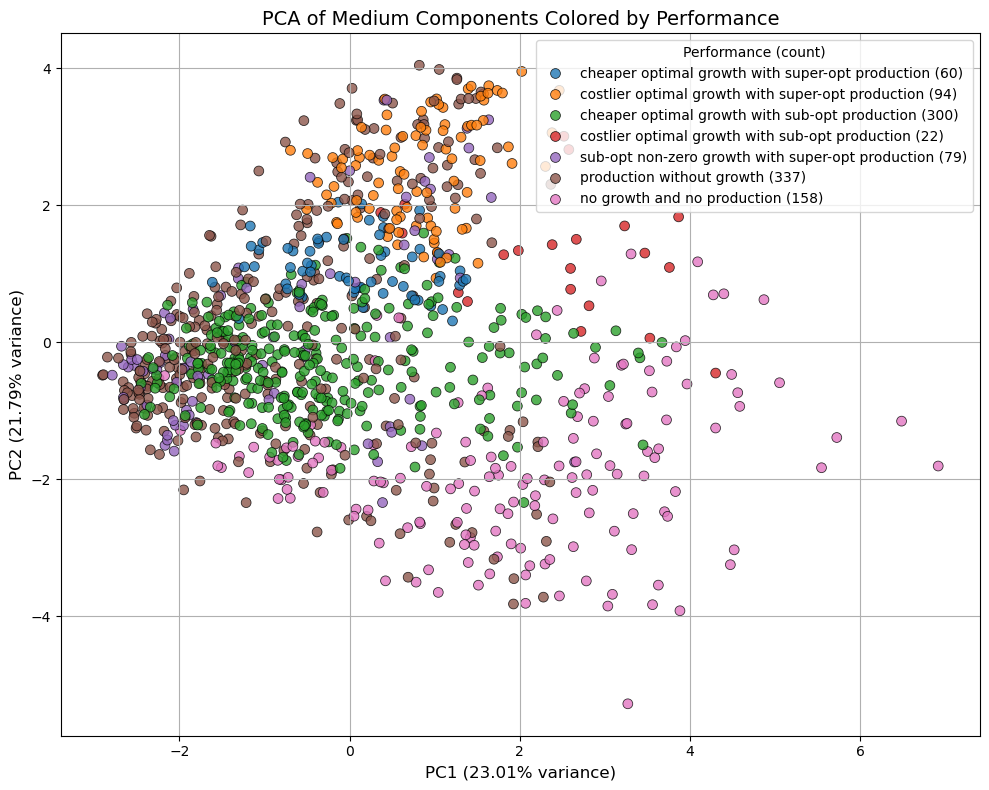

In [14]:
figname = basename + "_PCA"
figname = basename + "_PCA_without-production-without-growth"
figname = "fig"
PCA_plot(result, medium_iJO1366_enriched, model_iJO1366_antiEpEX_scFv, figname)

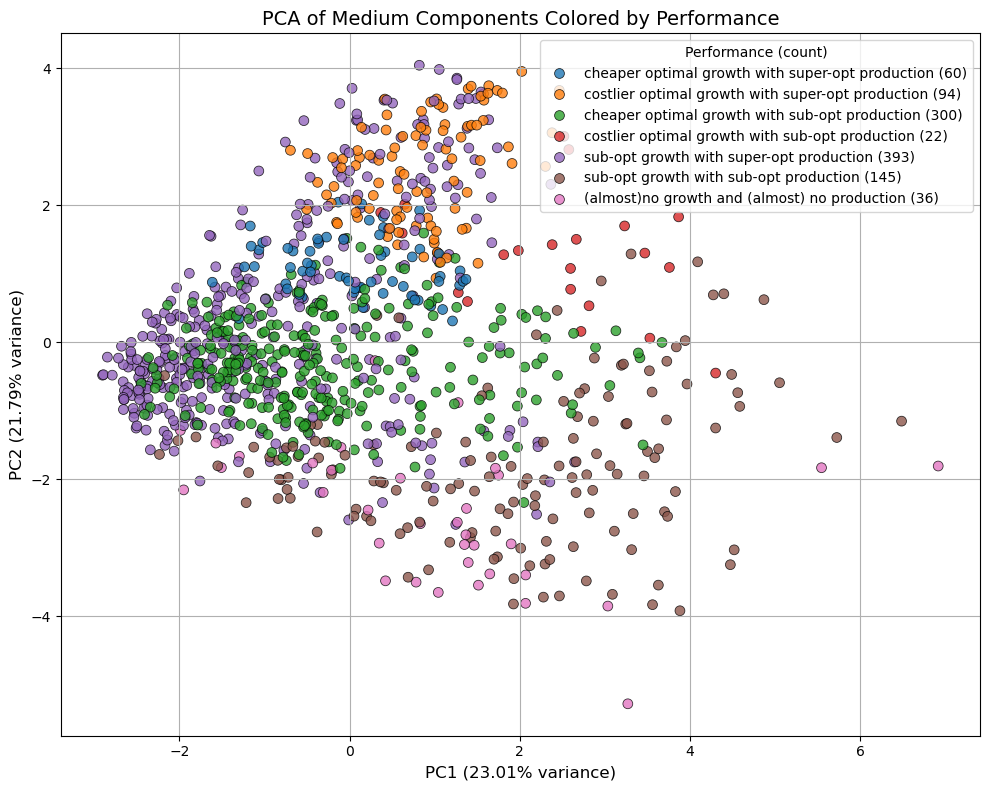

In [22]:
figname = basename + "_PCA_2"
#figname = basename + "_PCA_without-production-without-growth"
PCA_plot_2(result, medium_iJO1366_enriched, model_iJO1366_antiEpEX_scFv, figname)

### t-SNE

Running t-SNE with perplexity=20...


C:\Users\Nicola\AppData\Local\Temp\ipykernel_35800\2216495229.py:48: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(


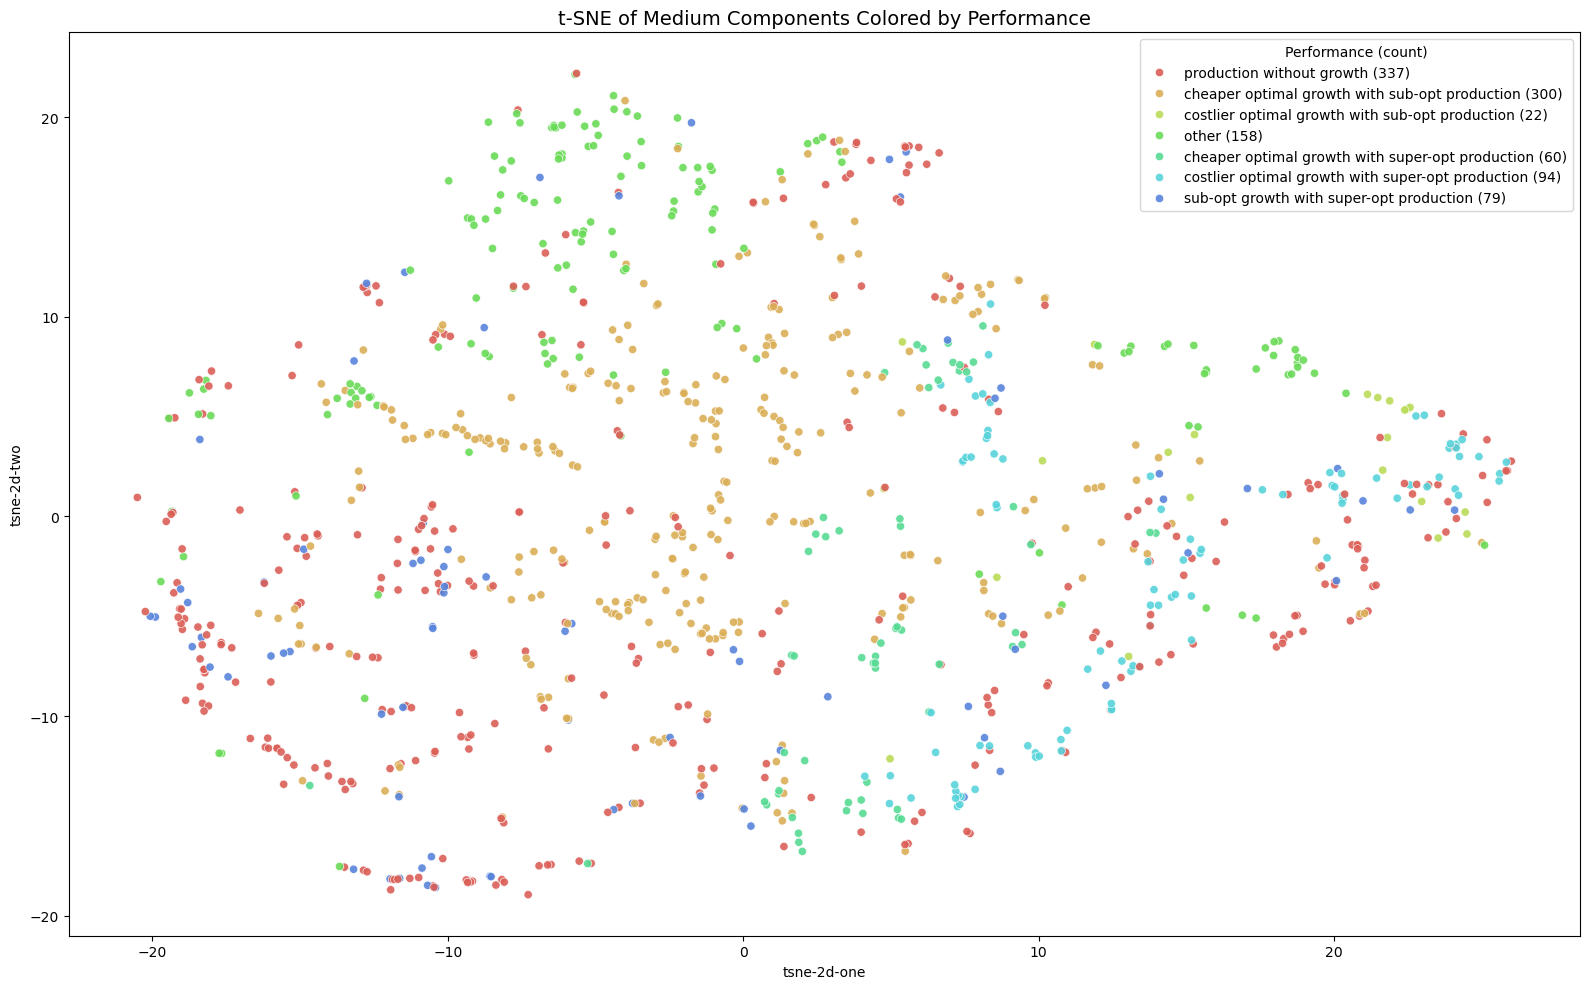

Running t-SNE with perplexity=23...


C:\Users\Nicola\AppData\Local\Temp\ipykernel_35800\2216495229.py:48: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(


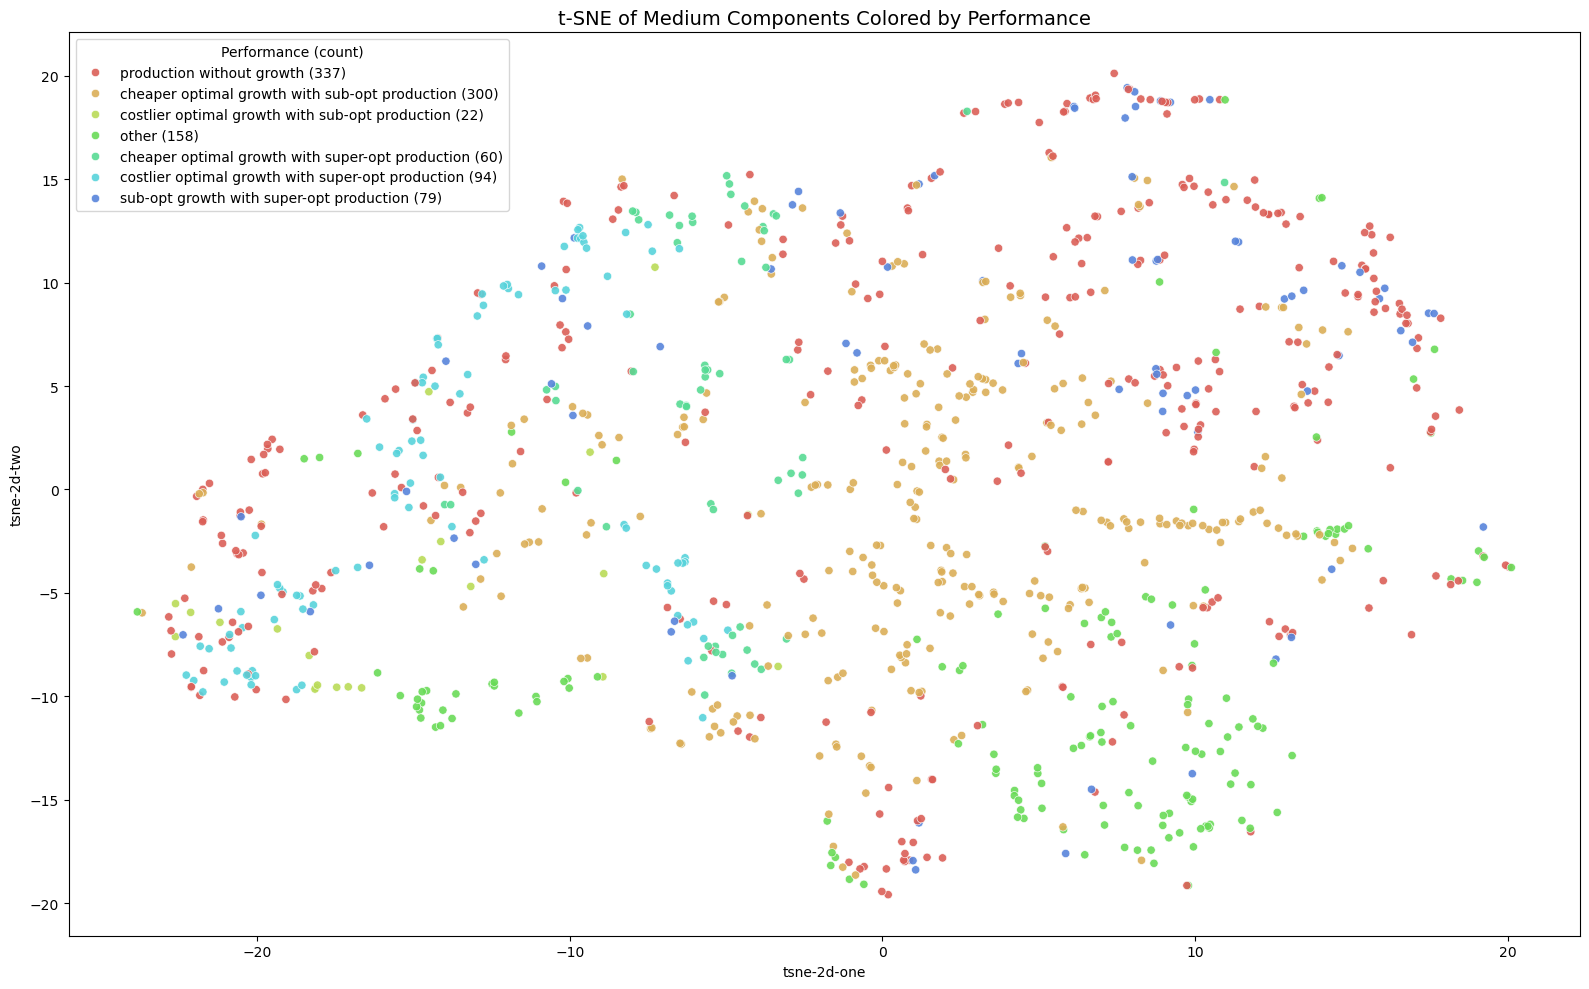

Running t-SNE with perplexity=27...


C:\Users\Nicola\AppData\Local\Temp\ipykernel_35800\2216495229.py:48: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(


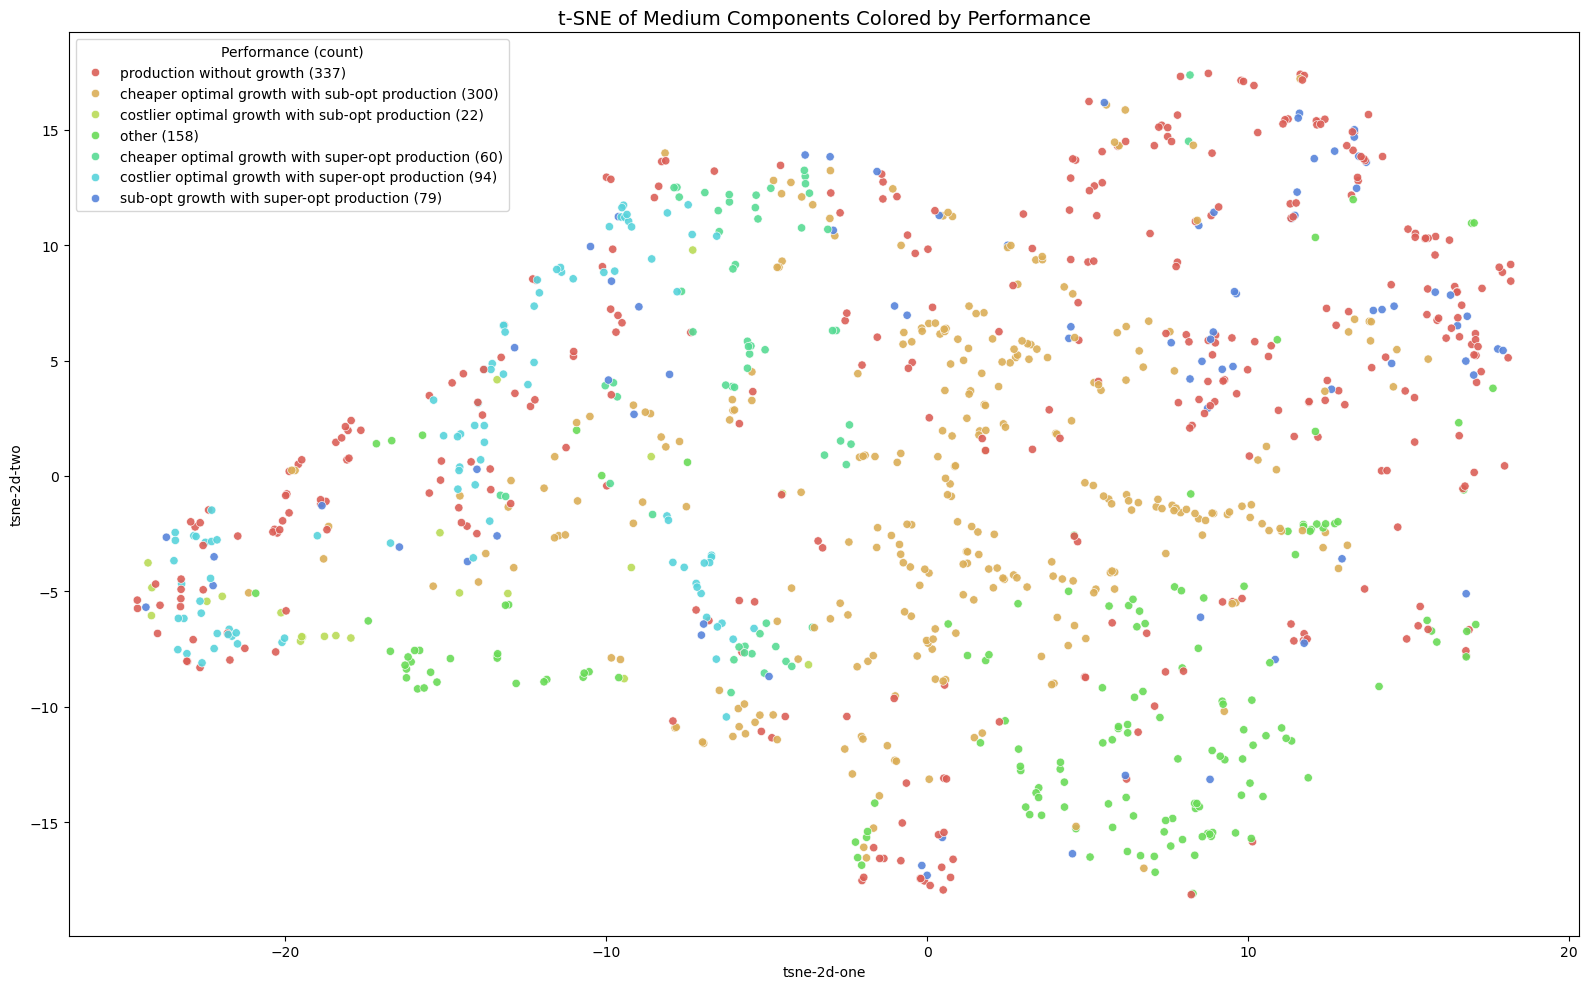

Running t-SNE with perplexity=30...


C:\Users\Nicola\AppData\Local\Temp\ipykernel_35800\2216495229.py:48: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(


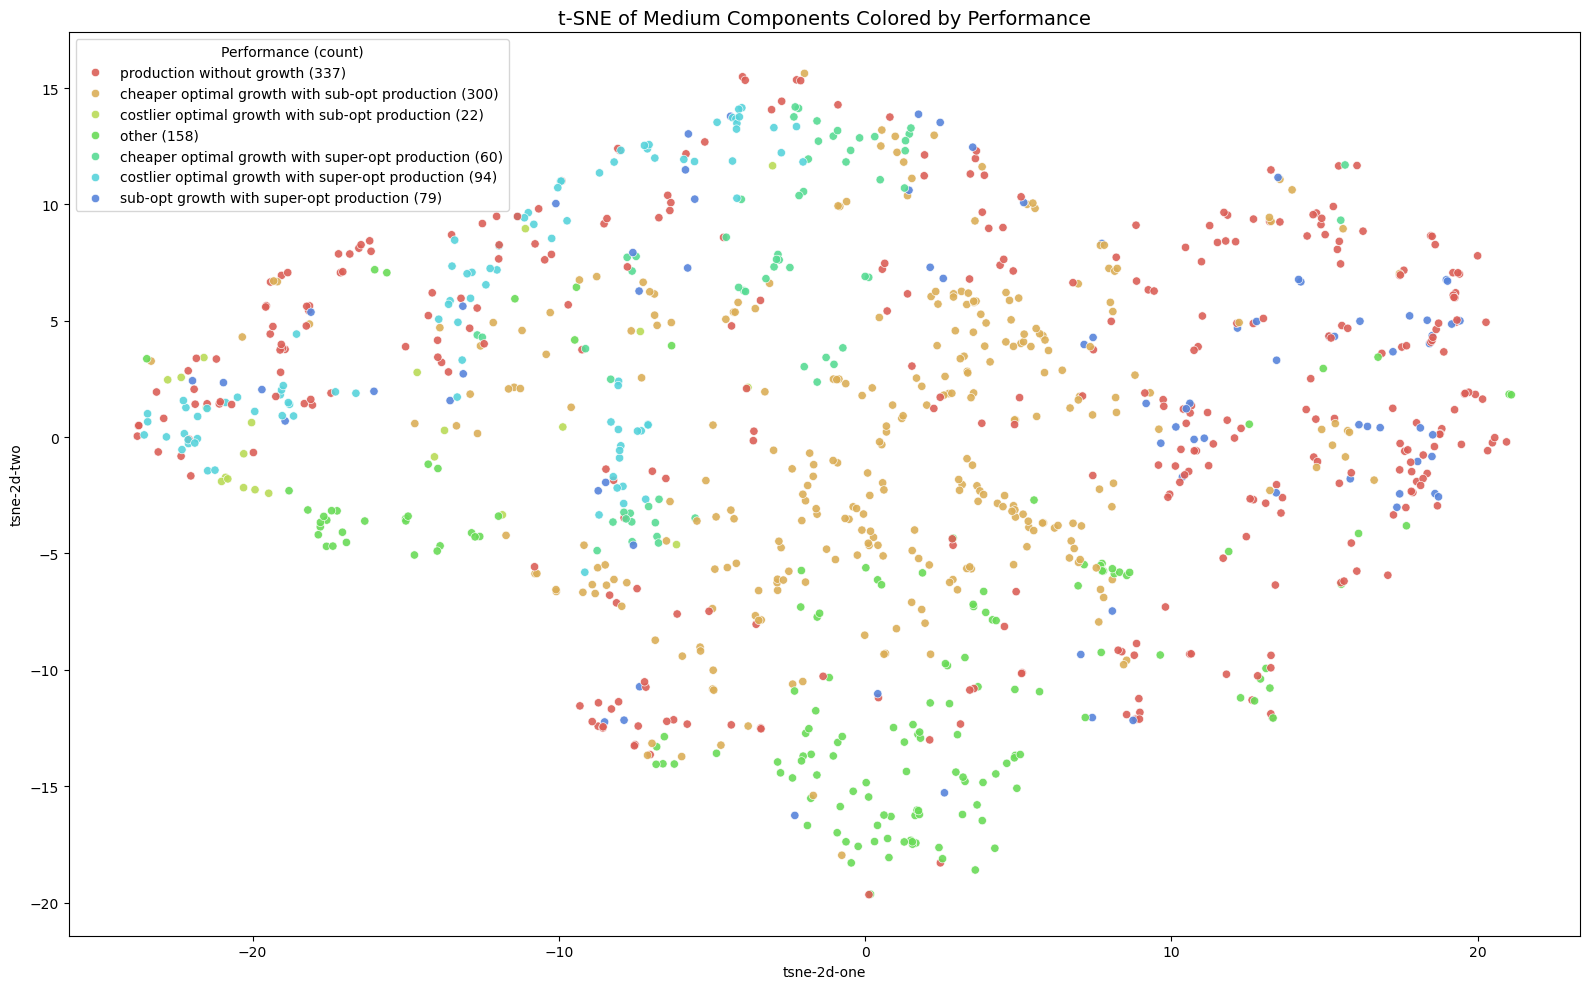

In [25]:
# Define the range of perplexity values
perplexity_values = [20, 23, 27, 30]

# Loop over the perplexity values and call the t_SNE_plot function for each
for perplexity in perplexity_values:
    figname = basename + f"_t-SNE_perplexity_{perplexity}"
    print(f"Running t-SNE with perplexity={perplexity}...")
    t_SNE_plot(result, initial_medium, MetModel, figname, perplexity=perplexity)


### UMAP

c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Nicola\AppData\Local\Temp\ipykernel_39064\2206485931.py:52: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(


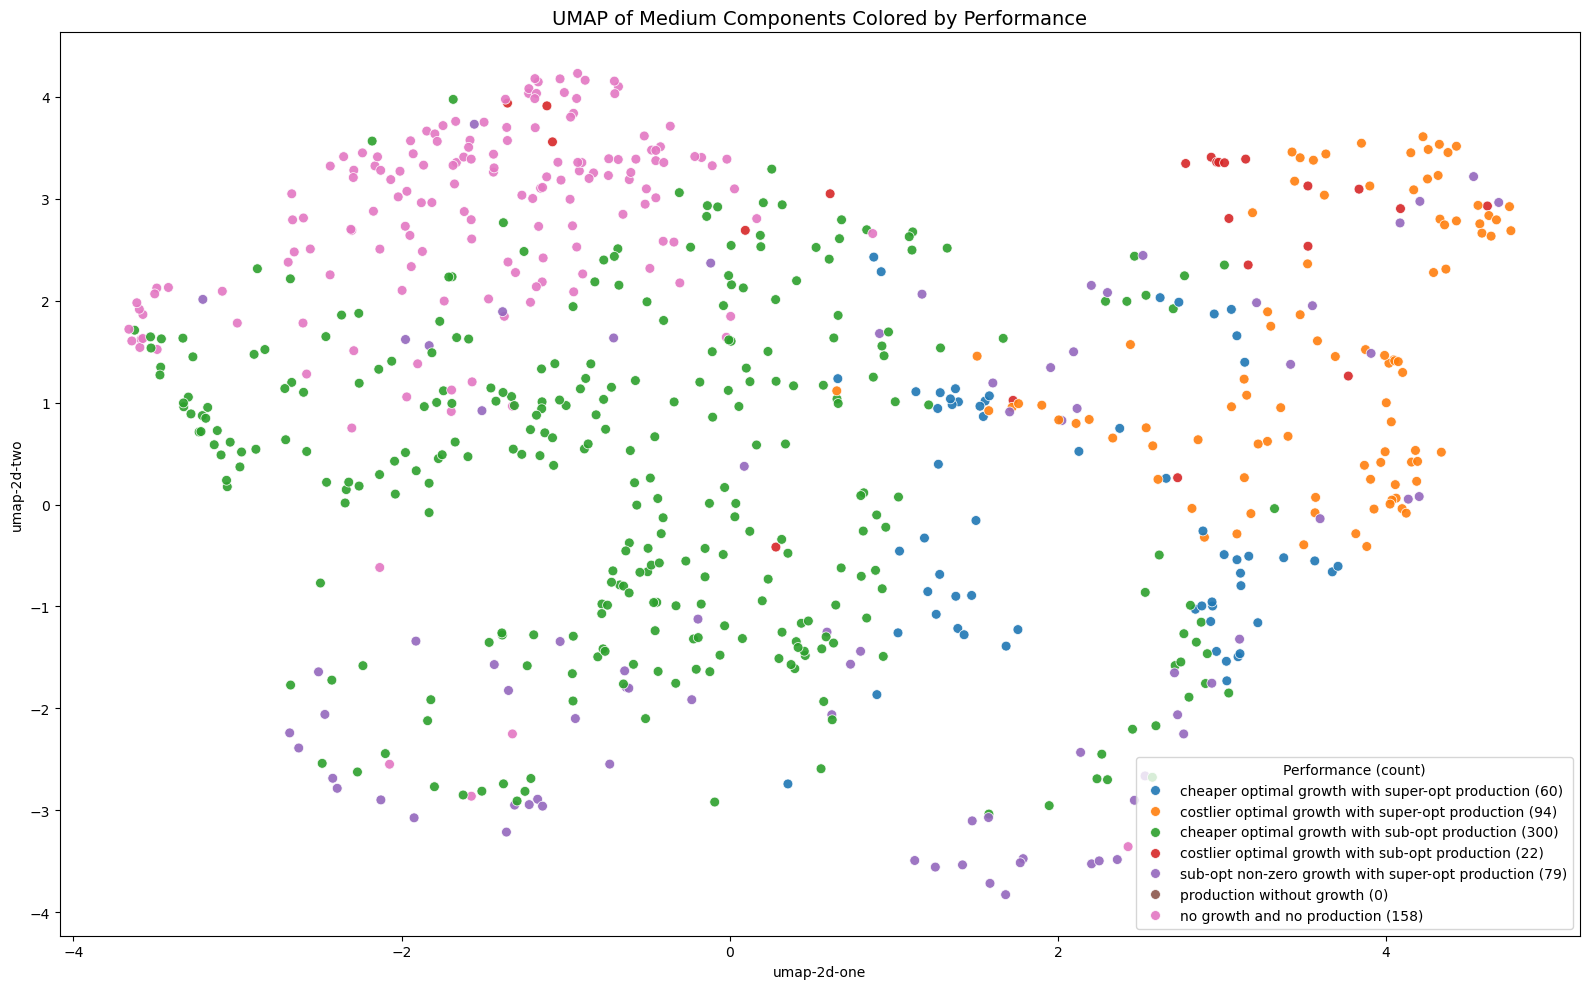

In [20]:
n_neighbors = 35
min_dist = 0.2
figname = basename + "_UMAP"
figname = basename + "_UMAP_without-production-without-growth"
UMAP_plot(result, initial_medium, MetModel, figname, n_neighbors, min_dist)

c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nicola\anaconda3\envs\Bayesian-opt\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\Nicola\AppData\Local\Temp\ipykernel_28308\211362480.py:52: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.scatterplot(


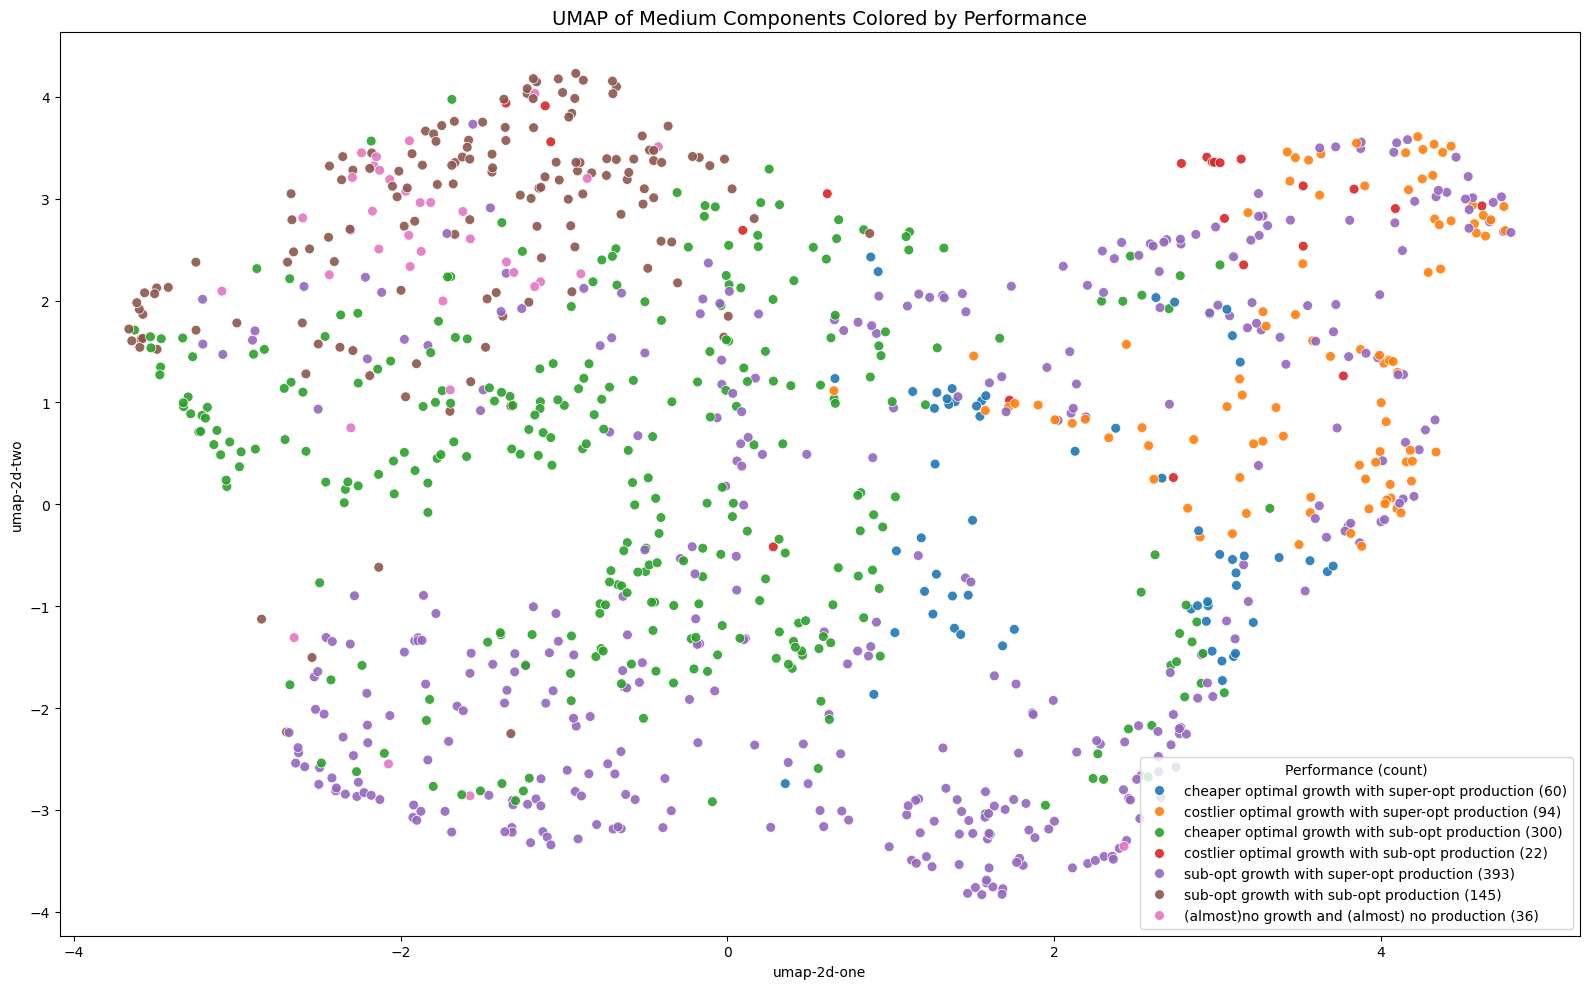

In [23]:
n_neighbors = 35
min_dist = 0.2
figname = basename + "_UMAP_2"
UMAP_plot_2(result, initial_medium, MetModel, figname, n_neighbors, min_dist)

## Pairplots

In [ ]:
top_percentage = 20
figname = basename + "_pairplot-best-" + str(top_percentage) + "percent"
pairplot_best(result, top_percentage = top_percentage, figname = figname)

In [ ]:
figname = basename + "_pairplot-pareto"
pairplot_pareto(result, figname = figname)

## Stripplots

### By Category

C:\Users\Nicola\AppData\Local\Temp\ipykernel_28308\3464470613.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_components["performance_label"] = results_df["performance"].apply(


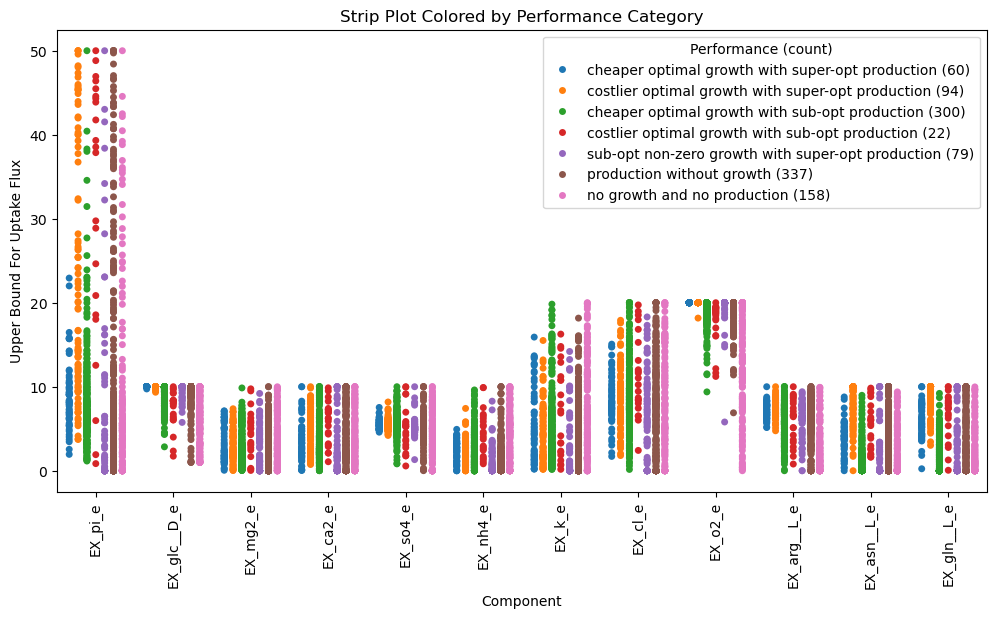

<Figure size 640x480 with 0 Axes>

In [10]:
# ToDo: Image doesn't get saved properly (is blank)
figname = basename + "_stripplot-by-performance_long"
stripplot_long_by_performance(result, initial_medium, MetModel, figname = figname)

C:\Users\Nicola\AppData\Local\Temp\ipykernel_28308\16068412.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_components["performance_label"] = results_df["performance"].apply(


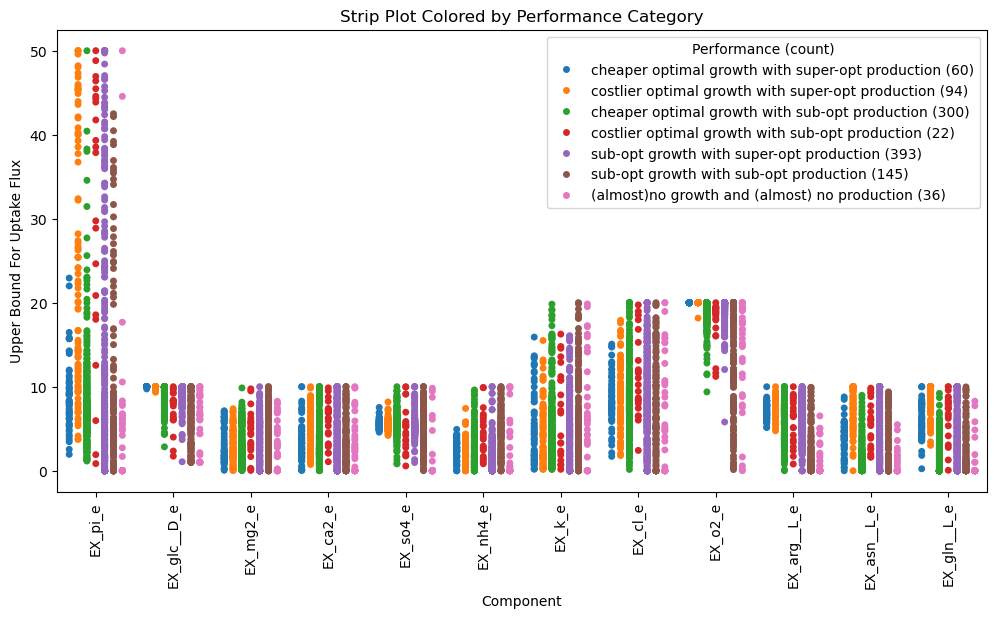

<Figure size 640x480 with 0 Axes>

In [24]:
# ToDo: Image doesn't get saved properly (is blank)
figname = basename + "_stripplot-by-performance_long_2"
stripplot_long_by_performance_2(result, initial_medium, MetModel, figname = figname)

In [ ]:
# ToDo: Too long titles are being cut off
figname = basename + "_stripplot-by-performance"
stripplot_by_performance(result, initial_medium, MetModel, figname = figname)

### Best

C:\Users\Nicola\AppData\Local\Temp\ipykernel_35800\3021773306.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_top20.drop(columns = "growth per cost", inplace = True) # exclude growth per cost


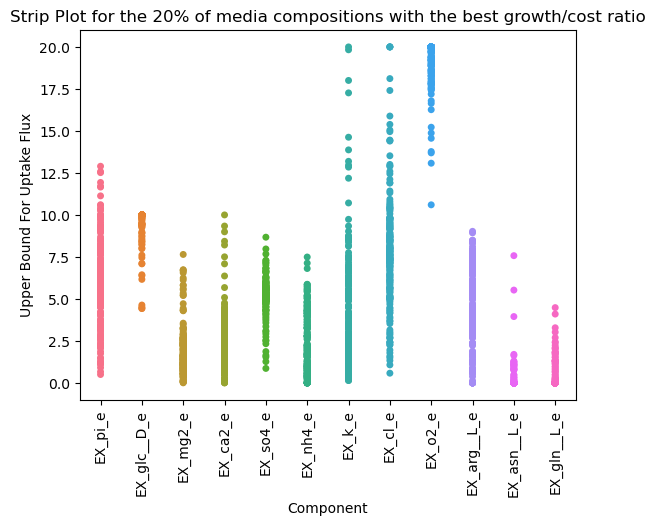

In [ ]:
# ToDo: Too long titles are being cut off
top_percentage = 20
figname = basename + "_stripplot-best-" + str(top_percentage) + "percent"
# 2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qNEHVI_100it_round_4_stripplot-best-20percent_.png
stripplot_best(result, top_percentage = top_percentage, figname = figname)

C:\Users\Nicola\AppData\Local\Temp\ipykernel_35800\1688898164.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_top20.drop(columns = "growth per cost", inplace = True) # exclude growth per cost


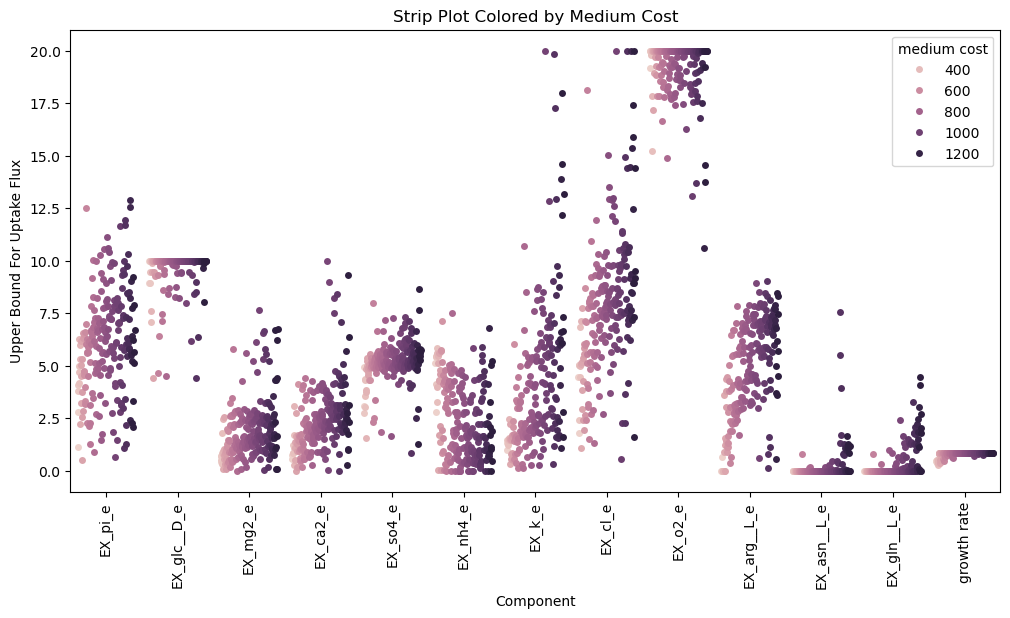

<Figure size 640x480 with 0 Axes>

In [ ]:
# ToDo: Image doesn't get saved 
top_percentage = 20
figname = basename + "_stripplot-best-" + str(top_percentage) + "percent_long-medium-cost"
# 2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qNEHVI_100it_round_4_stripplot-best-20percent_long-medium-cost.png
stripplot_best_long_medium_cost(result, top_percentage = top_percentage, figname = figname)

C:\Users\Nicola\AppData\Local\Temp\ipykernel_35800\999299077.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_top20.drop(columns = "growth per cost", inplace = True) # exclude growth per cost


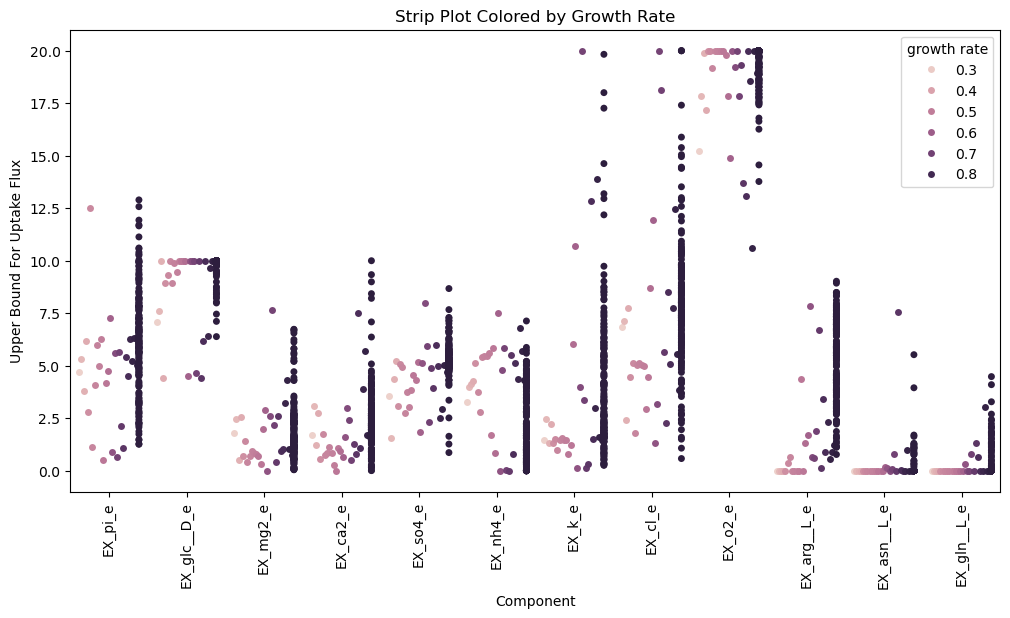

<Figure size 640x480 with 0 Axes>

In [ ]:
top_percentage = 20
figname = basename + "_stripplot-best-" + str(top_percentage) + "percent_long-growth-rate"
# 2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qNEHVI_100it_round_4_stripplot-best-20percent_long-growth-rate.png
stripplot_best_long_growth_rate(result, top_percentage = top_percentage, figname = figname)

## Heatmap

In [35]:
figname = basename + "_clustermap"
medium_clustermap(result, initial_medium, MetModel, figname)

NotImplementedError: isna is not defined for MultiIndex